<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/Dogs_vs_Cats_tiny_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check GPU Status

In [ ]:
!nvidia-smi

# Import dataset from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/training_set'
test_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/test_set'

# Import libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Creating augmented data generators

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

# Pre-processing data

In [ ]:
training_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

# Model 1 (baseline model)

## Creating baseline model

In [ ]:
# create the model 
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Flatten())

model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# fit the model
history_1 = model_1.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

## Plot loss curves

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
plot_loss_curves(history_1)

## Evaluate baseline model

In [ ]:
model_1.evaluate(test_data)

# Model 2 - improving the baseline model

Adding more layers (Dense layer with 128 neurons)

## Creating the model 2

In [ ]:
# create the model 2
model_2 = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Flatten())

model_2.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# compile the model 2
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# fit the model 2
history_2 = model_2.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

## Plot loss curves

In [ ]:
plot_loss_curves(history_2)

## Evaluate the model 2

In [ ]:
model_2.evaluate(test_data)

# Model 3 - Improvement for the model 2
Adding more filters to the Conv2D layers

## Creating model 3

In [ ]:
# create the model 3
model_3 = tf.keras.models.Sequential()

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Flatten())

model_3.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# compile model 3
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [20]:
# fit the model 3
history_3 = model_3.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 44s 172ms/step - loss: 0.6831 - accuracy: 0.5627 - val_loss: 0.6491 - val_accuracy: 0.6205
Epoch 2/5
251/251 [==============================] - 43s 172ms/step - loss: 0.6531 - accuracy: 0.6222 - val_loss: 0.6568 - val_accuracy: 0.6260
Epoch 3/5
251/251 [==============================] - 43s 171ms/step - loss: 0.6314 - accuracy: 0.6489 - val_loss: 0.6510 - val_accuracy: 0.6285
Epoch 4/5
251/251 [==============================] - 43s 173ms/step - loss: 0.6093 - accuracy: 0.6704 - val_loss: 0.5692 - val_accuracy: 0.7185
Epoch 5/5
251/251 [==============================] - 43s 172ms/step - loss: 0.5903 - accuracy: 0.6812 - val_loss: 0.6302 - val_accuracy: 0.6705


## Plot loss curves

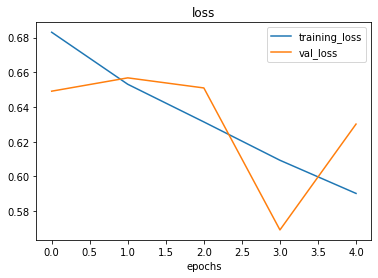

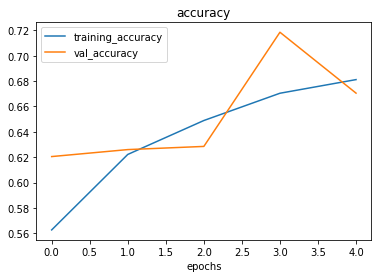

In [21]:
plot_loss_curves(history_3)

## Evaluate the model 3

In [22]:
model_3.evaluate(test_data)

63/63 [==============================] - 7s 109ms/step - loss: 0.6302 - accuracy: 0.6705


[0.6301820874214172, 0.6704999804496765]

# Model 4 - adding more epochs
model 3 seems overfitting therefore adding more epochs to the model.

## creating model 4

In [23]:
# create the model 4
model_4 = tf.keras.models.Sequential()

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Flatten())

model_4.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# compile model 4
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# fit the model 4
history_4 = model_4.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 44s 172ms/step - loss: 0.6863 - accuracy: 0.5478 - val_loss: 0.6632 - val_accuracy: 0.6375
Epoch 2/25
149/251 [================>.............] - ETA: 14s - loss: 0.6657 - accuracy: 0.5993

## Plot loss curves

In [ ]:
plot_loss_curves(history_4)

##Evaluate model 4

In [ ]:
model_4.evaluate(test_data)

# Model 5 - Improvment for the model 4
adding more filters to the second Conv2D layer.

## creating model 5

In [ ]:
# create the model 5
model_5 = tf.keras.models.Sequential()

model_5.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Flatten())

model_5.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# compile model 5
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# fit the model 5
history_5 = model_5.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

## Plot loss curves

In [ ]:
plot_loss_curves(history_5)

## Evaluate model 5

In [ ]:
model_5.evaluate(test_data)

# Model 6 - Imporvment for model 5
Adding more convolutional and maxpool layer

## Creating the model

In [ ]:
# create the model 6
model_6 = tf.keras.models.Sequential()

model_6.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Flatten())

model_6.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# compile model 6
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# fit the model 6
history_6 = model_6.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

## Plot loss curves

In [ ]:
plot_loss_curves(history_6)

## Evaluate the model 5

In [ ]:
model_6.evaluate(test_data)